## Import Library yang diperlukan

In [ ]:
# Install library yang sudah ada
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Labelling dan preprocessing data

In [ ]:
# Install library yang sudah ada
from transformers import pipeline, AutoTokenizer
import pandas as pd
from tqdm.notebook import tqdm

# Load dataset
df = pd.read_csv('scrapped_comments.csv')
df.dropna(inplace=True)
df = df.head(12000).copy()

# Load pipeline dan tokenizer
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
sentiment_pipeline = pipeline("text-classification", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Mapping label
label_mapping = {
    'negative': 'negatif',
    'neutral': 'netral',
    'positive': 'positif'
}

# Fungsi klasifikasi dengan batasan token
def get_label(text):
    tokens = tokenizer(text, max_length=512, truncation=True, return_tensors="pt")
    truncated_text = tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True)
    result = sentiment_pipeline(truncated_text)[0]
    return label_mapping[result['label']]

# Tambahkan progress bar ke apply
tqdm.pandas()
df['label'] = df['comments'].progress_apply(get_label)

# Simpan hasil
df = df[['comments', 'label']]
df.to_csv('labeled_comments.csv', index=False)
print("File saved as labeled_comments.csv ✅")


Device set to use cpu


  0%|          | 0/12000 [00:00<?, ?it/s]

File saved as labeled_comments.csv ✅


In [ ]:
# Import Library yang diperlukan
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Bersihkan teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)               # Hapus link
    text = re.sub(r"@\w+", "", text)                  # Hapus mention
    text = re.sub(r"[^\x00-\x7F]+", "", text)         # Hapus emoji & karakter non-ASCII
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # Hapus karakter selain huruf
    return text

# Terapkan ke data
df['cleaned'] = df['comments'].apply(clean_text)

# Encode label
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])  # 0=negatif, 1=netral, 2=positif

# Hapus baris kosong setelah preprocessing
df = df[df['cleaned'].str.strip().astype(bool)]
df.dropna(subset=['cleaned'], inplace=True)
df = df[df['cleaned'].str.strip() != '']

# Simpan ulang
df.to_csv('labeled_comments.csv', index=False)
print(f"Jumlah dataset akhir: {len(df)} sampel")


Jumlah dataset akhir: 11817 sampel


## Text Classification menggunakan FastText dan LSTM

In [ ]:
pip install fasttext scikit-learn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313487 sha256=671517538cf37a6ea559b3f6764a7b085e51408d2a40d833314364f3147c7166
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


Loading dataset...
Training FastText...
Splitting dataset...
Training model LSTM...
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.5926 - loss: 0.8138 - val_accuracy: 0.8515 - val_loss: 0.3689
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.9423 - loss: 0.1817 - val_accuracy: 0.9690 - val_loss: 0.0830
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9616 - loss: 0.1169 - val_accuracy: 0.9859 - val_loss: 0.0591
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9802 - loss: 0.0751 - val_accuracy: 0.9746 - val_loss: 0.0957
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.9821 - loss: 0.0664 - val_accuracy: 0.9709 - val_loss: 0.0930
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9803 - loss: 0.0690 - val_accuracy: 0.9887 - val_loss: 0.0434
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9863 - loss: 0.0521 - val_accuracy: 0.9859 - val_loss: 0.0558
Epoch 

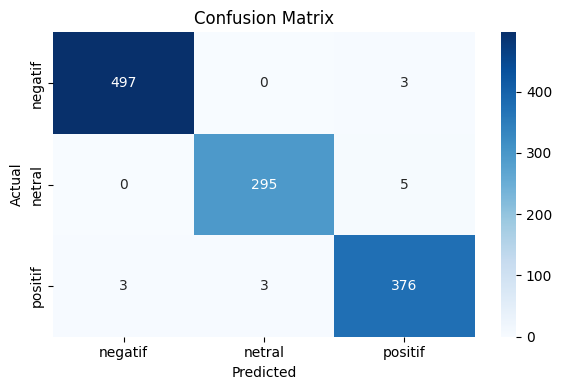

In [ ]:
import pandas as pd
import re
import fasttext
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk membersihkan teks dari karakter yang tidak dibutuhkan
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|[^a-z\s]", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    text = text.replace("\n", " ")
    return text.strip()

# Load dataset dari file CSV
print("Loading dataset...")
df = pd.read_csv("labeled_comments.csv")
df.dropna(inplace=True)
df["cleaned"] = df["comments"].apply(clean_text)
df = df[df["cleaned"].str.strip().astype(bool)]

# Encode label ke bentuk numerik
le = LabelEncoder()
df["label_enc"] = le.fit_transform(df["label"])
y = df["label_enc"]

# Latih model FastText
print("Training FastText...")
df_fasttext = df[["cleaned", "label_enc"]].copy()
df_fasttext["fasttext"] = "__label__" + df_fasttext["label_enc"].astype(str) + " " + df_fasttext["cleaned"]
df_fasttext["fasttext"].to_csv("fasttext_train.txt", index=False, header=False)

ft_model = fasttext.train_supervised(input="fasttext_train.txt", epoch=10, lr=1.0, wordNgrams=2, verbose=1)

# Ambil representasi vektor dari setiap komentar
X = np.vstack([ft_model.get_sentence_vector(text) for text in df["cleaned"]])

# Bagi data jadi data latih dan data uji
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Ubah label ke bentuk one-hot encoding (untuk multi-kelas)
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Bangun model deep learning berbasis LSTM
print("Training model LSTM...")
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Sesuaikan bentuk input untuk LSTM
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Latih model
history = model.fit(
    X_train_r, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)

# Evaluasi model terhadap data uji
print("Evaluating model...")
y_pred_probs = model.predict(X_test_r)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Text Classification menggunakan FastText dan TF-IDF

Loading dataset...
Mengubah teks ke fitur dengan TF-IDF...
Melatih FastText dan mengambil representasi kalimat...
Menggabungkan fitur TF-IDF dan FastText...
Melatih model klasifikasi dengan Random Forest...
Akurasi: 0.9945008460236887
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00      1000
      netral       0.99      1.00      0.99       599
     positif       0.99      0.99      0.99       765

    accuracy                           0.99      2364
   macro avg       0.99      0.99      0.99      2364
weighted avg       0.99      0.99      0.99      2364



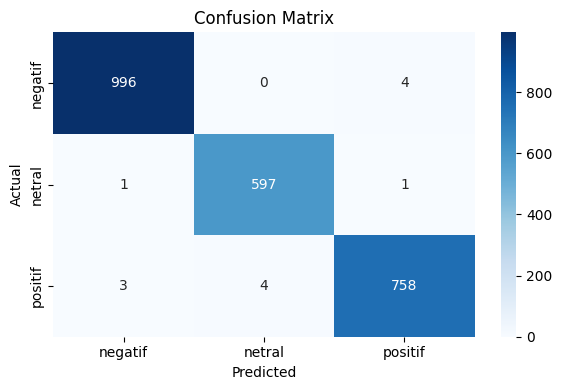

In [ ]:
import pandas as pd
import numpy as np
import re
import fasttext
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Fungsi untuk membersihkan teks dari karakter yang tidak diperlukan
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|[^a-z\s]", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    text = text.replace("\n", " ")
    return text.strip()

# Load data komentar
print("Loading dataset...")
df = pd.read_csv("labeled_comments.csv")
df.dropna(inplace=True)
df["cleaned"] = df["comments"].apply(clean_text)
df = df[df["cleaned"].str.strip().astype(bool)]

# Encode label ke angka
le = LabelEncoder()
df["label_enc"] = le.fit_transform(df["label"])
y = df["label_enc"]

# TF-IDF: ubah teks menjadi fitur berdasarkan bobot kata
print("Mengubah teks ke fitur dengan TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df["cleaned"]).toarray()

# Latih model FastText untuk ambil representasi kalimat
print("Melatih FastText dan mengambil representasi kalimat...")
df_fasttext = df[["cleaned", "label_enc"]].copy()
df_fasttext["fasttext"] = "__label__" + df_fasttext["label_enc"].astype(str) + " " + df_fasttext["cleaned"]
df_fasttext["fasttext"].to_csv("fasttext_train.txt", index=False, header=False)

ft_model = fasttext.train_supervised(input="fasttext_train.txt", epoch=10, lr=1.0, wordNgrams=2, verbose=1)
X_ft = np.vstack([ft_model.get_sentence_vector(text) for text in df["cleaned"]])

# Gabungkan fitur TF-IDF dan FastText
print("Menggabungkan fitur TF-IDF dan FastText...")
X_combined = np.concatenate([X_tfidf, X_ft], axis=1)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=42)

# Latih model klasifikasi (Random Forest)
print("Melatih model klasifikasi dengan Random Forest...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluasi hasil prediksi
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Tampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


## Text Classification menggunakan FastText dan LinearSVC

Loading dataset...
Training FastText...
Splitting dataset...
Training LinearSVC...
Accuracy [FastText]: 0.9949238578680203
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00       500
      netral       1.00      0.99      0.99       300
     positif       0.99      0.99      0.99       382

    accuracy                           0.99      1182
   macro avg       0.99      0.99      0.99      1182
weighted avg       0.99      0.99      0.99      1182



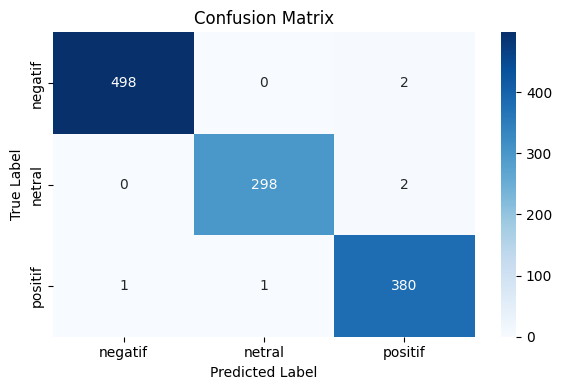

In [ ]:
import pandas as pd
import re
import fasttext
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Loading dataset...")
df = pd.read_csv("labeled_comments.csv")
df.dropna(inplace=True)

# Preprocessing
df["cleaned"] = df["comments"].apply(clean_text)
df = df[df["cleaned"].str.strip().astype(bool)]

# Encode label
le = LabelEncoder()
df["label_enc"] = le.fit_transform(df["label"])
y = df["label_enc"]

# Simpan format ke file .txt untuk fastText
df_fasttext = df[["cleaned", "label_enc"]].copy()
df_fasttext.loc[:, "fasttext"] = "__label__" + df_fasttext["label_enc"].astype(str) + " " + df_fasttext["cleaned"]
df_fasttext["fasttext"].to_csv("fasttext_train.txt", index=False, header=False)

# Train FastText
print("Training FastText...")
ft_model = fasttext.train_supervised(input="fasttext_train.txt", epoch=10, lr=1.0, wordNgrams=2, verbose=1)

# Hapus newline dari kalimat sebelum masuk ke get_sentence_vector
X_vectors = np.vstack([ft_model.get_sentence_vector(text.replace("\n", " ")) for text in df["cleaned"]])

# Train-test split
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.1, stratify=y, random_state=42)

# Train classifier
print("Training LinearSVC...")
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy [FastText]:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Text Classification menggunakan TF-IDF dan SVM

Loading dataset...
Melakukan vektorisasi teks dengan TF-IDF...
Membagi dataset (80% latih, 20% uji)...
Melatih model dengan LinearSVC...
Akurasi model (TF-IDF + LinearSVC): 0.7241962774957699
              precision    recall  f1-score   support

     negatif       0.77      0.80      0.78       750
      netral       0.67      0.64      0.65       449
     positif       0.71      0.69      0.70       574

    accuracy                           0.72      1773
   macro avg       0.71      0.71      0.71      1773
weighted avg       0.72      0.72      0.72      1773



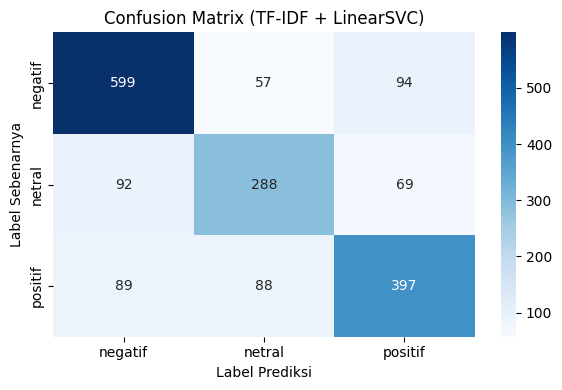

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membersihkan teks komentar
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\w+|[^a-z\s]", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    text = text.replace("\n", " ")
    return text.strip()

# Membaca dan membersihkan dataset
print("Loading dataset...")
df = pd.read_csv("labeled_comments.csv")
df.dropna(inplace=True)
df["cleaned"] = df["comments"].apply(clean_text)
df = df[df["cleaned"].str.strip().astype(bool)]

# Encode label menjadi angka
le = LabelEncoder()
df["label_enc"] = le.fit_transform(df["label"])
y = df["label_enc"]

# Ekstraksi fitur dengan TF-IDF
print("Melakukan vektorisasi teks dengan TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned"])

# Split data menjadi latih dan uji
print("Membagi dataset (80% latih, 20% uji)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# Melatih model klasifikasi menggunakan LinearSVC
print("Melatih model dengan LinearSVC...")
svm_model = LinearSVC(C=1, random_state=42, dual=False, max_iter=1000)
svm_model.fit(X_train, y_train)

# Evaluasi model
y_pred = svm_model.predict(X_test)
print("Akurasi model (TF-IDF + LinearSVC):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot confusion matrix untuk melihat performa prediksi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (TF-IDF + LinearSVC)")
plt.xlabel("Label Prediksi")
plt.ylabel("Label Sebenarnya")
plt.tight_layout()
plt.show()


##Text Classification menggunakan TF-IDF dan Support Vector Machine (SVM)

Memuat dataset...
Melakukan vektorisasi teks dengan TF-IDF...


Proses TF-IDF: 100%|██████████| 11817/11817 [00:00<00:00, 26177.67it/s]


Membagi data menjadi data latih dan data uji...
Melatih model LinearSVC...
Evaluasi performa model...
Akurasi [LinearSVC + TF-IDF]: 0.739424703891709
              precision    recall  f1-score   support

     negatif       0.78      0.81      0.79       500
      netral       0.67      0.64      0.66       300
     positif       0.73      0.73      0.73       382

    accuracy                           0.74      1182
   macro avg       0.73      0.73      0.73      1182
weighted avg       0.74      0.74      0.74      1182

Menampilkan confusion matrix...


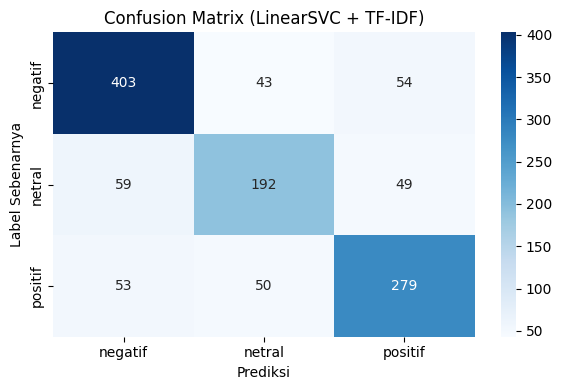

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
print("Memuat dataset...")
df = pd.read_csv('labeled_comments.csv')
df.dropna(inplace=True)

# Gunakan seluruh data (atau sampling jika perlu)
df_sample = df.copy()

# Vektorisasi teks dengan TF-IDF
print("Melakukan vektorisasi teks dengan TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(tqdm(df_sample['cleaned'], desc="Proses TF-IDF"))
y = df_sample['label_enc']

# Split data
print("Membagi data menjadi data latih dan data uji...")
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.1, random_state=42, stratify=y
)

# Training model
print("Melatih model LinearSVC...")
svm_model = LinearSVC(C=1, max_iter=1000, dual=False, random_state=42, tol=1e-4)
svm_model.fit(X_train, y_train)

# Evaluasi model
print("Evaluasi performa model...")
y_pred_svm = svm_model.predict(X_test)
print("Akurasi [LinearSVC + TF-IDF]:", accuracy_score(y_test, y_pred_svm))

# Classification report
try:
    print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
except:
    print(classification_report(y_test, y_pred_svm))

# Confusion Matrix (Heatmap)
print("Menampilkan confusion matrix...")
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=getattr(le, 'classes_', sorted(set(y))),
            yticklabels=getattr(le, 'classes_', sorted(set(y))))
plt.title("Confusion Matrix (LinearSVC + TF-IDF)")
plt.xlabel("Prediksi")
plt.ylabel("Label Sebenarnya")
plt.tight_layout()
plt.show()


Text classification yang menggunakan Model gabungan Fasttext memenuhi tingkat akurasi diatas 92% sementara untuk model gabungan lain memilliki rata" tingkat akurasi di 70%

jika didistribusikan menggunakan sentimen asli, maka persepsi orang terhadap video willie salim adalah sebagai berikut:

negatif: (500 / 1182) * 100 ≈ 42.29%

netral: (300 / 1182) * 100 ≈ 25.38%

positif: Positif	382	(382 / 1182) * 100 ≈ 32.33%

dengan total data 1182 sampel

sehingga: penonton lebih sering menyuarakan opini negatif daripada yang positif atau netral